## EXP_2389_sim_prune_04_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


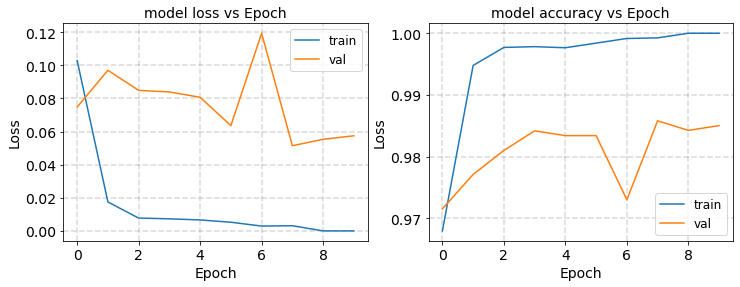

run 1


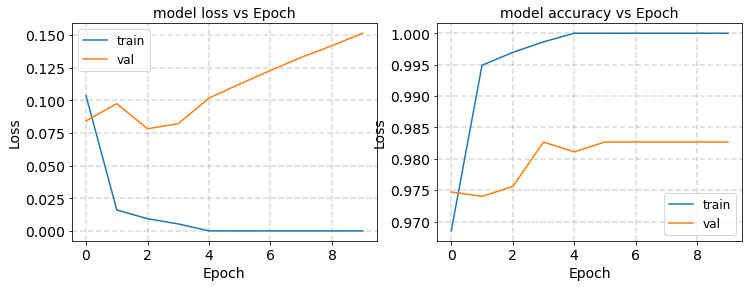

run 2


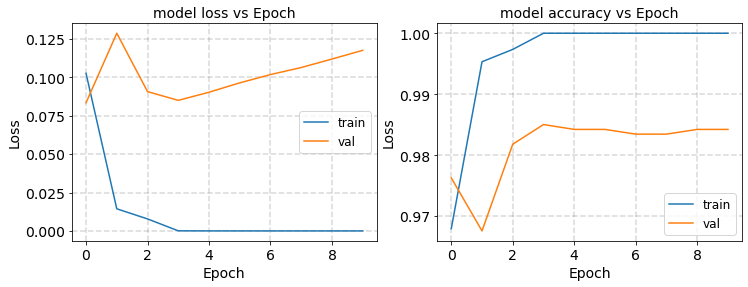

run 3


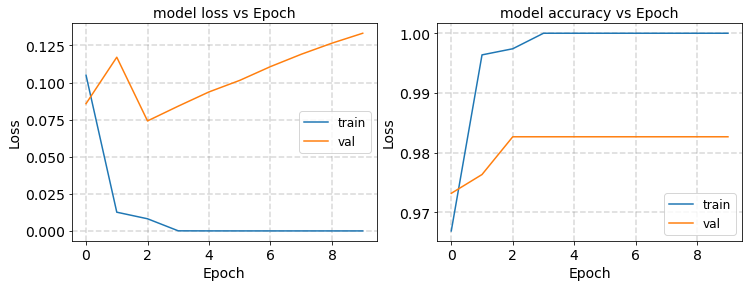

run 4


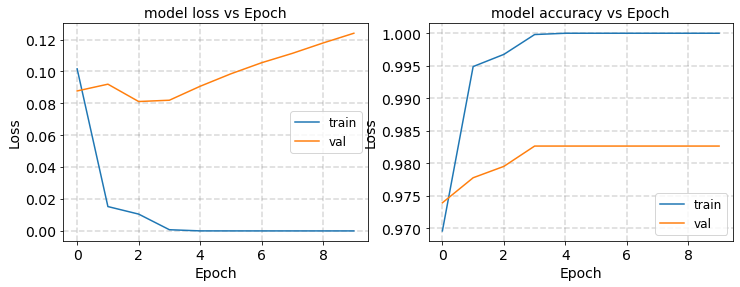

run 5


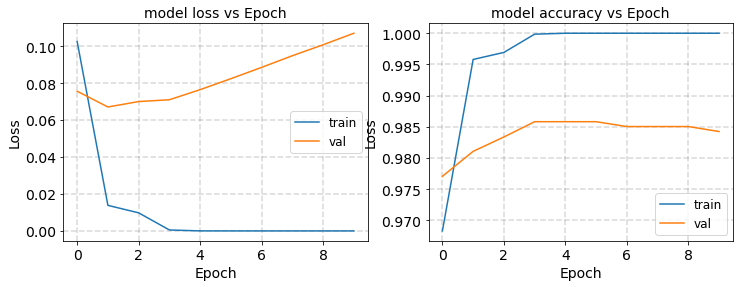

run 6


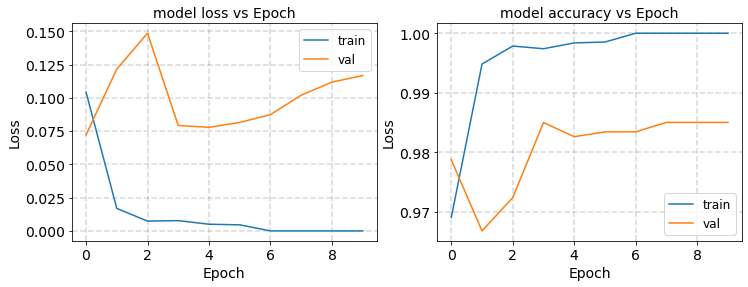

run 7


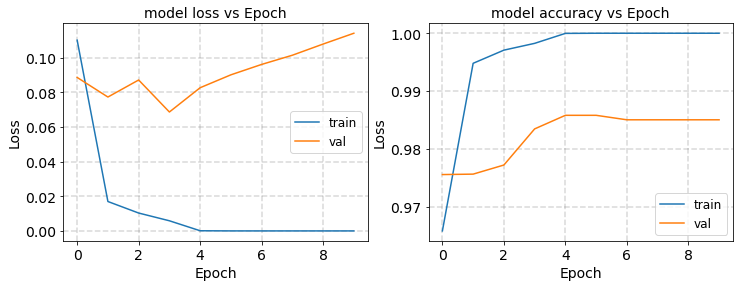

run 8


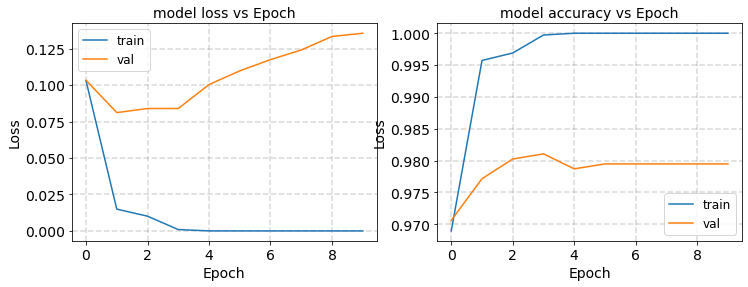

run 9


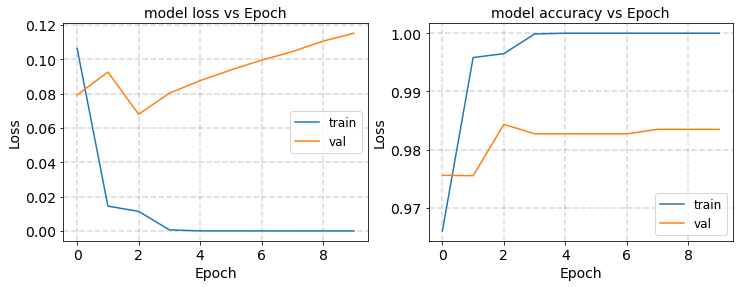

CPU times: user 19min 51s, sys: 1min 37s, total: 21min 29s
Wall time: 20min 45s


In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_sim_prune_04_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=0.4,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_04_4_128_run0,2.18413,2.16214,0.0174618,0.00390458,90,0.2,No,larger,0.985025
2389_sim_prune_04_4_128_run1,2.17844,2.17249,0.0273926,0.00612518,70,0.6,No,larger,0.982675
2389_sim_prune_04_4_128_run2,2.2122,2.18941,0.0177048,0.00395891,80,0.4,No,larger,0.984225
2389_sim_prune_04_4_128_run3,2.21587,2.17112,0.0204425,0.00457108,100,0,Yes,larger,0.98265
2389_sim_prune_04_4_128_run4,2.17962,2.18379,0.0155955,0.00348727,45,0.9,No,smaller,0.98265
2389_sim_prune_04_4_128_run5,2.20163,2.18106,0.0156759,0.00350524,85,0.3,No,larger,0.98425
2389_sim_prune_04_4_128_run6,2.17143,2.18183,0.0189284,0.00423251,30,0.6,No,smaller,0.985025
2389_sim_prune_04_4_128_run7,2.17769,2.1689,0.0114322,0.00255632,80,0.4,No,larger,0.985025
2389_sim_prune_04_4_128_run8,2.1751,2.20219,0.0198722,0.00444355,10,0.2,No,smaller,0.979475
2389_sim_prune_04_4_128_run9,2.22631,2.17039,0.0193679,0.0043308,100,0,Yes,larger,0.9835


#### Save dataframe

In [6]:
import pickle
with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2389_sim_prune_04_4_128_run0,2.18413,2.16214,0.0174618,0.00390458,90,0.2,No,larger,0.985025
2389_sim_prune_04_4_128_run1,2.17844,2.17249,0.0273926,0.00612518,70,0.6,No,larger,0.982675
2389_sim_prune_04_4_128_run2,2.2122,2.18941,0.0177048,0.00395891,80,0.4,No,larger,0.984225
2389_sim_prune_04_4_128_run3,2.21587,2.17112,0.0204425,0.00457108,100,0,Yes,larger,0.98265
2389_sim_prune_04_4_128_run4,2.17962,2.18379,0.0155955,0.00348727,45,0.9,No,smaller,0.98265
2389_sim_prune_04_4_128_run5,2.20163,2.18106,0.0156759,0.00350524,85,0.3,No,larger,0.98425
2389_sim_prune_04_4_128_run6,2.17143,2.18183,0.0189284,0.00423251,30,0.6,No,smaller,0.985025
2389_sim_prune_04_4_128_run7,2.17769,2.1689,0.0114322,0.00255632,80,0.4,No,larger,0.985025
2389_sim_prune_04_4_128_run8,2.1751,2.20219,0.0198722,0.00444355,10,0.2,No,smaller,0.979475
2389_sim_prune_04_4_128_run9,2.22631,2.17039,0.0193679,0.0043308,100,0,Yes,larger,0.9835


In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.07804403,  0.06488354,  0.        , ..., -0.        ,
        -0.        , -0.04241444],
       [ 0.        ,  0.        , -0.        , ...,  0.        ,
         0.03604765, -0.0327392 ],
       [ 0.04803138, -0.        , -0.04071203, ..., -0.        ,
        -0.07889421,  0.06566117],
       ...,
       [ 0.        ,  0.        ,  0.07407985, ..., -0.06354291,
        -0.        , -0.08064895],
       [-0.0489896 ,  0.        ,  0.05844373, ...,  0.04323976,
        -0.06115475, -0.05132946],
       [-0.06376974, -0.03329191,  0.04052383, ...,  0.07192188,
        -0.        ,  0.06127717]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

2.1841289509097206
2.1621373457410655
0.017461804844930637
0.0039045782643100076
90.0
0.2
No
larger
0.9850249886512756
